<h1>Exploration Data Analysis</h1>

<h3> Objectives </h3>
<li>Perform EDA on our data set</li>

<h2>Import Libraries </h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pylab



<h2>The Data </h2>

In [2]:
#initialize our dataset
data = pd.read_csv("astronaut_data/astronauts.csv") 

In [3]:
# examine first few lines of our data
data.head(10)

,Unnamed: 0,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0
5,5,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,...,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.0,0.0
6,6,7,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,...,1970,Soyuz 9,Soyuz 9,Soyuz 9,Soyuz 9,424.00,519.33,0,0.0,0.0
7,7,8,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,...,1962,Vostok 4,Vostok 4,Vostok 4,Vostok 4,70.93,448.45,0,0.0,0.0
8,8,9,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,...,1974,Soyuz 14,Soyuz 14,Soyuz 14,Soyuz 14,377.00,448.45,0,0.0,0.0
9,9,10,7,3,"Schirra, Walter M., Jr.","Schirra, Walter M., Jr.",male,1923,U.S.,military,...,1962,Mercury-Atlas 8,Mercury-Atlas 8,Mercury-Atlas 8,Mercury-Atlas 8,9.22,295.20,0,0.0,0.0


In [4]:
# don't see a match with Unnamed: 0 in the original spreadsheet recieved, I will take this away
data = data.drop(columns='Unnamed: 0')

In [5]:
# rows and columns
data.shape

(1277, 24)

In [6]:
# basic stats of our data
data.describe()

,id,number,nationwide_number,year_of_birth,year_of_selection,mission_number,total_number_of_missions,year_of_mission,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,639.000000,274.233359,128.754111,1951.683634,1985.58888,1.992169,2.982772,1994.597494,1050.883984,2968.341410,0.628818,3.661287,10.761410
std,368.782456,148.185389,97.263590,11.435117,12.21917,1.145361,1.400745,12.583237,1714.791959,4214.715104,1.165753,7.287245,16.045247
min,1.000000,1.000000,1.000000,1921.000000,1959.00000,1.000000,1.000000,1961.000000,0.000000,0.610000,0.000000,0.000000,0.000000
25%,320.000000,153.000000,47.000000,1944.000000,1978.00000,1.000000,2.000000,1986.000000,190.030000,482.000000,0.000000,0.000000,0.000000
50%,639.000000,278.000000,110.000000,1952.000000,1987.00000,2.000000,3.000000,1995.000000,261.000000,932.000000,0.000000,0.000000,0.000000
75%,958.000000,390.000000,204.000000,1959.000000,1995.00000,3.000000,4.000000,2003.000000,382.000000,4264.000000,1.000000,4.720000,19.520000
max,1277.000000,565.000000,433.000000,1983.000000,2018.00000,7.000000,7.000000,2019.000000,10505.000000,21083.520000,7.000000,89.130000,78.800000


In [7]:
# understand our dtypes and what we're working with (time series, int, object, float, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   object 
 4   original_name             1272 non-null   object 
 5   sex                       1277 non-null   object 
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   object 
 8   military_civilian         1277 non-null   object 
 9   selection                 1272 non-null   object 
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   object 
 14  year_of_

In [8]:
# total of each dtype
data.dtypes.value_counts()

object     11
int64       9
float64     4
dtype: int64

<h2>Missing Data </h2>

In [9]:
# examine any missing data
data.isnull().sum()

id                          0
number                      0
nationwide_number           0
name                        0
original_name               5
sex                         0
year_of_birth               0
nationality                 0
military_civilian           0
selection                   5
year_of_selection           0
mission_number              0
total_number_of_missions    0
occupation                  0
year_of_mission             0
mission_title               1
ascend_shuttle              1
in_orbit                    0
descend_shuttle             1
hours_mission               0
total_hrs_sum               0
field21                     0
eva_hrs_mission             0
total_eva_hrs               0
dtype: int64

<h3>Clean up our missing data with Imputes, fillna </h3>

In [10]:
#Let's examine the empty values in original name column
nan_name  = data[data['original_name'].isna()] 
# print(nan_name)

In [11]:
# testing to make sure it returns empty dataframe
data[data['original_name'] == 'Al-saud, Sultan bin Salman']

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs


In [12]:
#take the NaN values from orignal_name and replace it with it's matched name
nan_name.fillna({'original_name':nan_name.name })

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
185,186,87,1,Vladimir Remek,Vladimir Remek,male,1948,Czechoslovakia,military,Air Gorce Group 6 - USSR,...,1978,Soyuz 28,Soyuz 28,Soyuz 28,Soyuz 28,190.28,190.28,0,0.0,0.0
368,369,173,1,"Al-saud, Sultan bin Salman","Al-saud, Sultan bin Salman",male,1956,Saudi Arabia,civilian,Saudi-Arabia,...,1985,STS-51G,STS-51G,STS-51G,STS-51G,170.00,170.00,0,0.0,0.0
415,416,195,1,"Neri Vela, Rodolfl","Neri Vela, Rodolfl",male,1952,Mexico,civilian,1985 NASA Group,...,1985,STS-61-B,STS-61-B,STS-61-B,STS-61-B,165.07,165.67,0,0.0,0.0
437,438,205,1,"Faris, M. Achmed","Faris, M. Achmed",male,1951,Syria,military,Syria,...,1987,1,Soyuz TM-3,Mir EP,Soyuz TM-2,191.00,191.00,0,0.0,0.0
449,450,211,1,"Mohmand, Abdul Ahad","Mohmand, Abdul Ahad",male,1959,Afghanistan,military,Afghanistan,...,1988,3,Soyuz TM-6,Mir EP,Soyuz TM-5,212.00,212.00,0,0.0,0.0


In [13]:
#Find empty value with boolean indexing columns with NaN on original_name and replace with name column
data[data['original_name'].isna()] = nan_name.fillna({'original_name':nan_name.name })

In [14]:
# will return the row of matching value, Success!
data[data['original_name'] == 'Al-saud, Sultan bin Salman']

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
368,369,173,1,"Al-saud, Sultan bin Salman","Al-saud, Sultan bin Salman",male,1956,Saudi Arabia,civilian,Saudi-Arabia,...,1985,STS-51G,STS-51G,STS-51G,STS-51G,170.0,170.0,0,0.0,0.0


In [15]:
#Look for empty values in selection column -> categorical data
nan_selection  = data[data['selection'].isna()] 
# print(nan_selection)
data[['selection']].info()


#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='most_frequent')# Instanciate a SimpleImputer object with strategy of choice
imputer.fit(data[['selection']]) # Call the "fit" method on the object
data['selection'] = imputer.transform(data[['selection']]) # Call the "transform" method on the object
imputer.statistics_ # The mean is stored in the transformer's memory


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   selection  1272 non-null   object
dtypes: object(1)
memory usage: 10.1+ KB


array(['NASA- 16'], dtype=object)

In [16]:
# find the row with missing info and analyze it
data[data['ascend_shuttle'].isna()] 
data[data['descend_shuttle'].isna()] 
# since we can find this data online let's fill the ascend shuttle and descend shuttle with our findings
data.iat[197, data.columns.get_loc('ascend_shuttle')] = 'Soyuz'
data.iat[197, data.columns.get_loc('descend_shuttle')] = 'Soyuz 35'


In [17]:
data[data['mission_title'].isna()] 
data.iat[1237, data.columns.get_loc('mission_title')] = 'Beyond'

<h2> 💻 drop_duplicates</h2>

In [19]:
print(len(data))
data.duplicated() # Check whether a row is a duplicated version of a previous row
data.duplicated().sum() # Compute the number of duplicated rows

1277


0

In [20]:
"""we see that it's counting extra nunique values since Pilot and pilot are capitlized different..
we need to go in and make it all lowercase and same with Other(space tourist)."""

print(data['occupation'].nunique())
data['occupation'].head(10)

# simple functions to replace different spelling of same category and combine them
def replace_p(x):
    return x.replace('P','p')
def replace_other(x):
    return x.replace('Other (Space tourist)', 'Other (space tourist)')
def replace_tourist(x):
    return x.replace('Space tourist', 'Other (space tourist)')

# apply the functions to our values in occupation column
data['occupation'] = data['occupation'].apply(replace_p)
data['occupation'] = data['occupation'].apply(replace_other)
data['occupation'] = data['occupation'].apply(replace_tourist)

12


In [21]:
# we see it dropped 3 unique values from 12 to 9
print(data['occupation'].nunique())

9


<h2> Plots to tell us the story with our data </h2>
<li># of times by nationality </li>
<li>Total Duration of All Missions in Hours</li>
<li>Total Women involved in missions </li>
<li>Mission initiated </li>
<li>Astronaut time in space by occupation, by country </li>

Text(0, 0.5, 'Nationality')

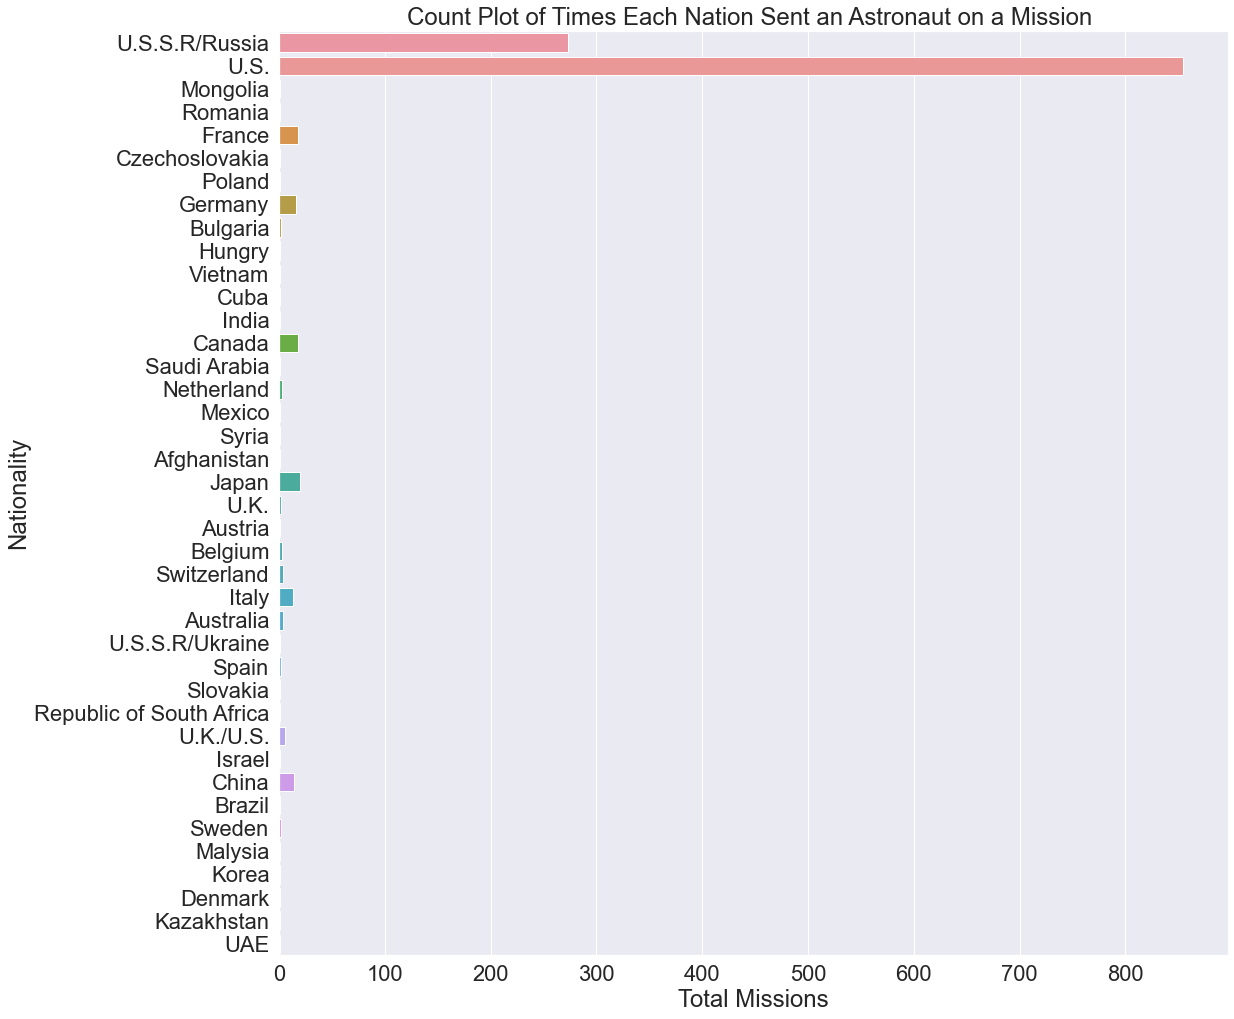

In [22]:
plt.figure(figsize=(17,17))
sns.set(font_scale = 2)

ax = sns.countplot(y='nationality', data=data)
ax.set_title("Count Plot of Times Each Nation Sent an Astronaut on a Mission ")
ax.set_xlabel('Total Missions')
ax.set_ylabel('Nationality')


In [23]:
# examine the unique values in the column
print(data['nationality'].nunique())
print(data['nationality'].value_counts().head(40))

40
U.S.                        854
U.S.S.R/Russia              273
Japan                        20
France                       18
Canada                       18
Germany                      16
China                        14
Italy                        13
U.K./U.S.                     6
Australia                     4
Switzerland                   4
Netherland                    3
Belgium                       3
Sweden                        2
Spain                         2
U.K.                          2
Bulgaria                      2
Mexico                        1
Republic of South Africa      1
Kazakhstan                    1
Denmark                       1
Korea                         1
Malysia                       1
Mongolia                      1
Brazil                        1
Romania                       1
Israel                        1
Czechoslovakia                1
Slovakia                      1
Syria                         1
Poland                        1
U.S.S

In [24]:
# Analyzing which astronauts spent the most hours in space
total_hrs_sum = data.groupby('name')['hours_mission'].sum()
total_hrs_sum.sort_values(ascending=False)

name
Padalka, Gennady                      21081.00
Krikalev, Sergei                      19280.00
Kaleri, Aleksandr                     18460.00
Avdeyev, Sergei                       17940.00
Malenchenko, Yuri                     16870.00
                                        ...   
Grissom, Virgil I.                        4.86
Gagarin, Yuri                             1.77
Jarvis, Gregory Bruce                     0.61
McAuliffe, Sharon Christa Corrigan        0.61
Smith, Michael John                       0.61
Name: hours_mission, Length: 564, dtype: float64

In [25]:
# Examine astronauts that have spent more than 6 months in space or 4380 hours
long_hours = data[data['total_hrs_sum'] > 4380] 
long_hours

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
65,66,100,50,"Savinykh, Viktor",Виктор Петрович Савиных,male,1940,U.S.S.R/Russia,civilian,NPOE-4,...,1985,Salyut 7,Soyuz T­13,Salyut 7,Soyuz T­14,4035.0,6065.63,0,0.00,5.00
66,67,100,50,"Savinykh, Viktor",Виктор Петрович Савиных,male,1940,U.S.S.R/Russia,civilian,NPOE-4,...,1988,2,Soyuz TM­5,Mir EP,Soyuz TM­4,236.0,6065.63,0,0.00,5.00
79,80,107,51,"Berezovoy, Anatoly",Анатолий Николаевич Березовой,male,1942,U.S.S.R/Russia,military,TsPK-5,...,1982,Salyut 7,Soyuz T­5,Salyut 7,Soyuz T­7,5073.0,5073.07,1,2.55,2.55
86,87,110,52,"Serebrov, Aleksandr",Александр Александрович Серебров,male,1944,U.S.S.R/Russia,civilian,NPOE-4,...,1982,Salyut 7,Soyuz T­7,Salyut 7,Soyuz T­5,189.0,8950.87,0,0.00,31.82
149,150,70,29,"Lebedev, Valentin",Валентин Витальевич Лебедев,male,1942,U.S.S.R/Russia,civilian,TsKBEM-2 / AN-4,...,1973,Soyuz 13,Soyuz 13,Soyuz 13,Soyuz 13,188.0,5261.98,0,0.00,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1270,559,344,"Hague, Tyler","Hague, Tyler",male,1975,U.S.,military,NASA-21,...,2018,57,Soyuz MS-10,aborted,aborted,0.0,4864.00,3,19.93,19.93
1270,1271,559,433,"Hague, Tyler","Hague, Tyler",male,1975,U.S.,military,NASA-21,...,2019,59,Soyuz MS-12,ISS,Soyuz MS-12,4864.0,4864.00,3,19.93,19.93
1271,1272,560,10,"Saint-Jaques, David","Saint-Jaques, David",male,1970,Canada,civilian,CSA-3,...,2018,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.0,4887.00,1,6.50,6.50
1272,1273,561,345,"McClain, Anne Charlotte","McClain, Anne Charlotte",female,1979,U.S.,military,NASA-21,...,2018,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.0,4887.00,2,13.13,13.13


In [26]:
print(long_hours['name'].nunique())
print(long_hours['nationality'].nunique())
# long_hours['nationality'].tolist()

# function to get unique values
def unique(list1):
    x = np.array(list1)
    return np.unique(x)
#apply the unique function on nationality column
unique_nation = unique(long_hours['nationality'])
print(unique_nation)

111
10
['Belgium' 'Canada' 'France' 'Germany' 'Italy' 'Japan' 'Netherland' 'U.K.'
 'U.S.' 'U.S.S.R/Russia']


Text(0, 0.5, 'Total Duration of All Missions in Hours')

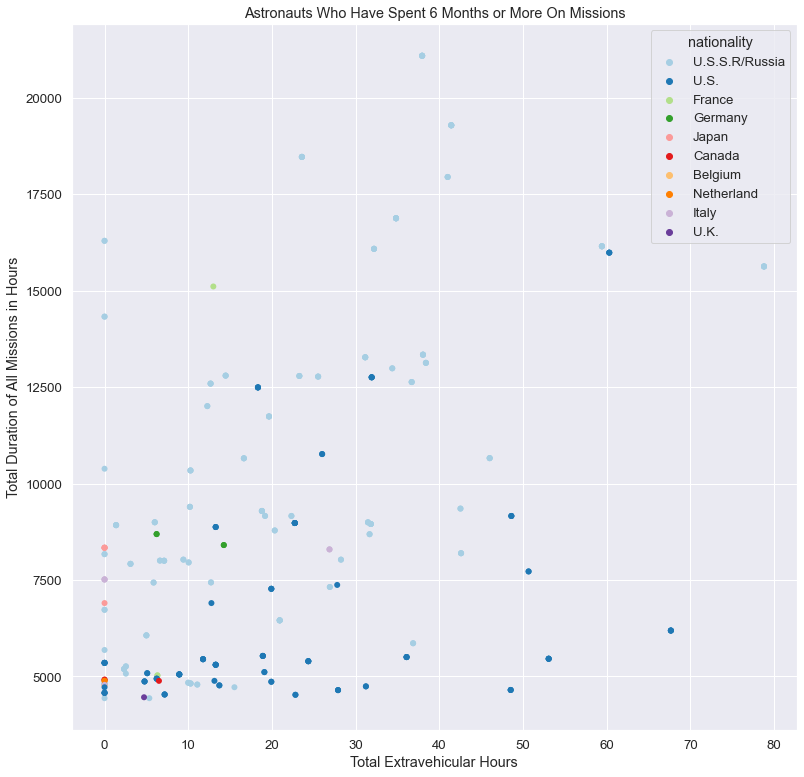

In [27]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.2)

# plot astronauts who have spent more than 4380 hours (6 months) in space or more
bx = sns.scatterplot(x='total_eva_hrs', y="total_hrs_sum",
            hue="nationality", 
            palette="Paired",
#             sizes=(10, 200), 
            linewidth=0,
            data=long_hours)

bx.set_title("Astronauts Who Have Spent 6 Months or More On Missions")
bx.set_xlabel('Total Extravehicular Hours')
bx.set_ylabel('Total Duration of All Missions in Hours')


# Attepted to plot each country and show data of their astronauts spending time in space.
#define plotting region (2 rows, 2 columns)
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(125,90))


# flatten axes for easy iterating
# for i, ax in enumerate(axes.flatten()):
# #     sns.boxplot(x= data.iloc[:, i],  orient='v' , ax=ax)
#     # plot astronauts who have spent more than 4380 hours (6 months) in space or more
#     bx = sns.scatterplot(x=i, y="total_hrs_sum",
#                 hue="nationality", 
#                 palette="Paired",
#                 sizes=(10, 200), 
#                 linewidth=0,
#                 data=long_hours,
#                 ax=ax)

# bx.set_title("Astronauts Who Have Spent 6 Months or More On Missions")
# bx.set_xlabel('Name Of Astronaut')
# bx.set_ylabel('Total Hours')

male      1134
female     143
Name: sex, dtype: int64


Text(0, 0.5, 'Nationality')

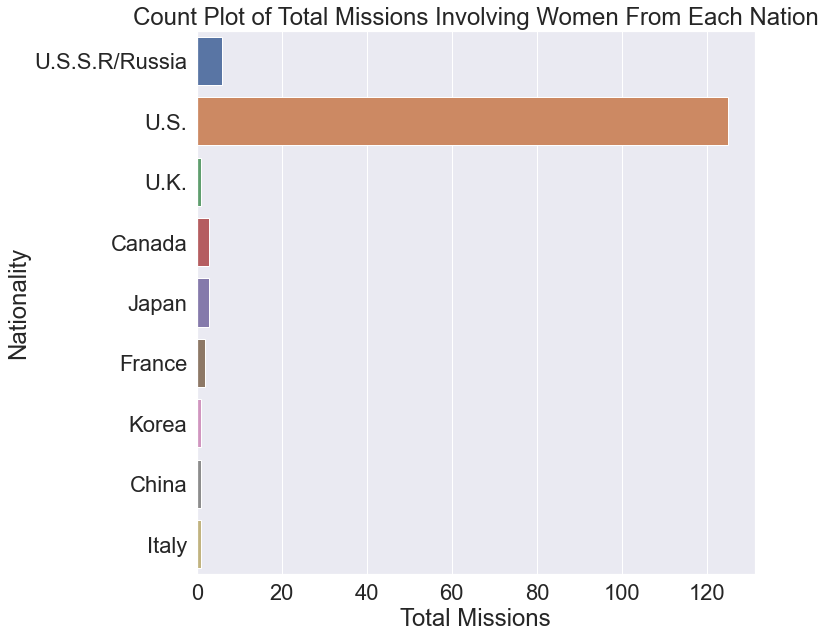

In [28]:
# dive into the values of men v women
print(data['sex'].value_counts())
female_astro = data[data.sex == 'female']

plt.figure(figsize=(10,10))
pp = sns.set(font_scale = 2)
pp = sns.countplot(y='nationality', data=female_astro) 
pp.set_title("Count Plot of Total Missions Involving Women From Each Nation")
pp.set_xlabel('Total Missions')
pp.set_ylabel('Nationality')

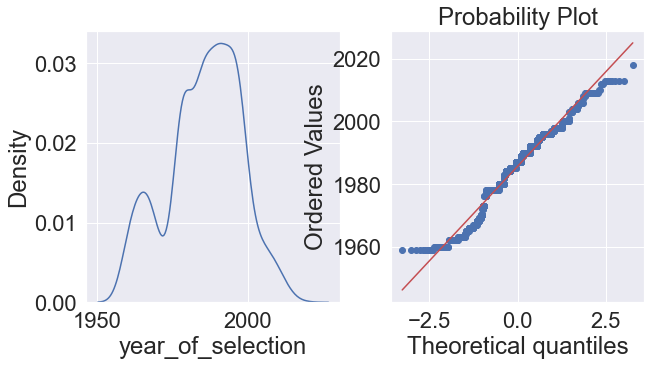

In [29]:
#function to return plots for the feature to see normal distribution
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
    
normality(data,'year_of_selection') 

Text(0.5, 0, 'Years')

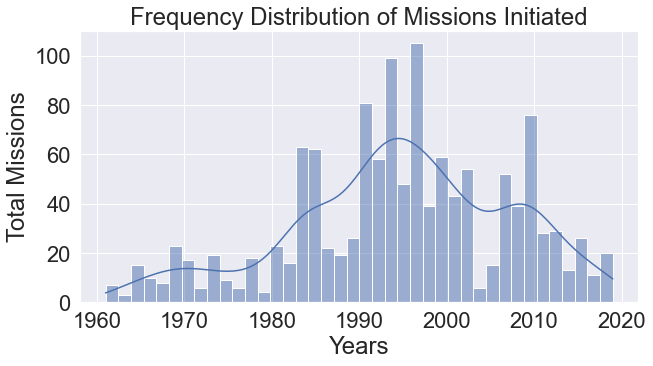

In [30]:
plt.figure(figsize=(10,5))

pp = sns.histplot(data['year_of_mission'], bins=40,kde=True)
pp.set_title("Frequency Distribution of Missions Initiated")
pp.set_ylabel('Total Missions')
pp.set_xlabel('Years')

Text(0.5, 0, 'Hours per astronaut')

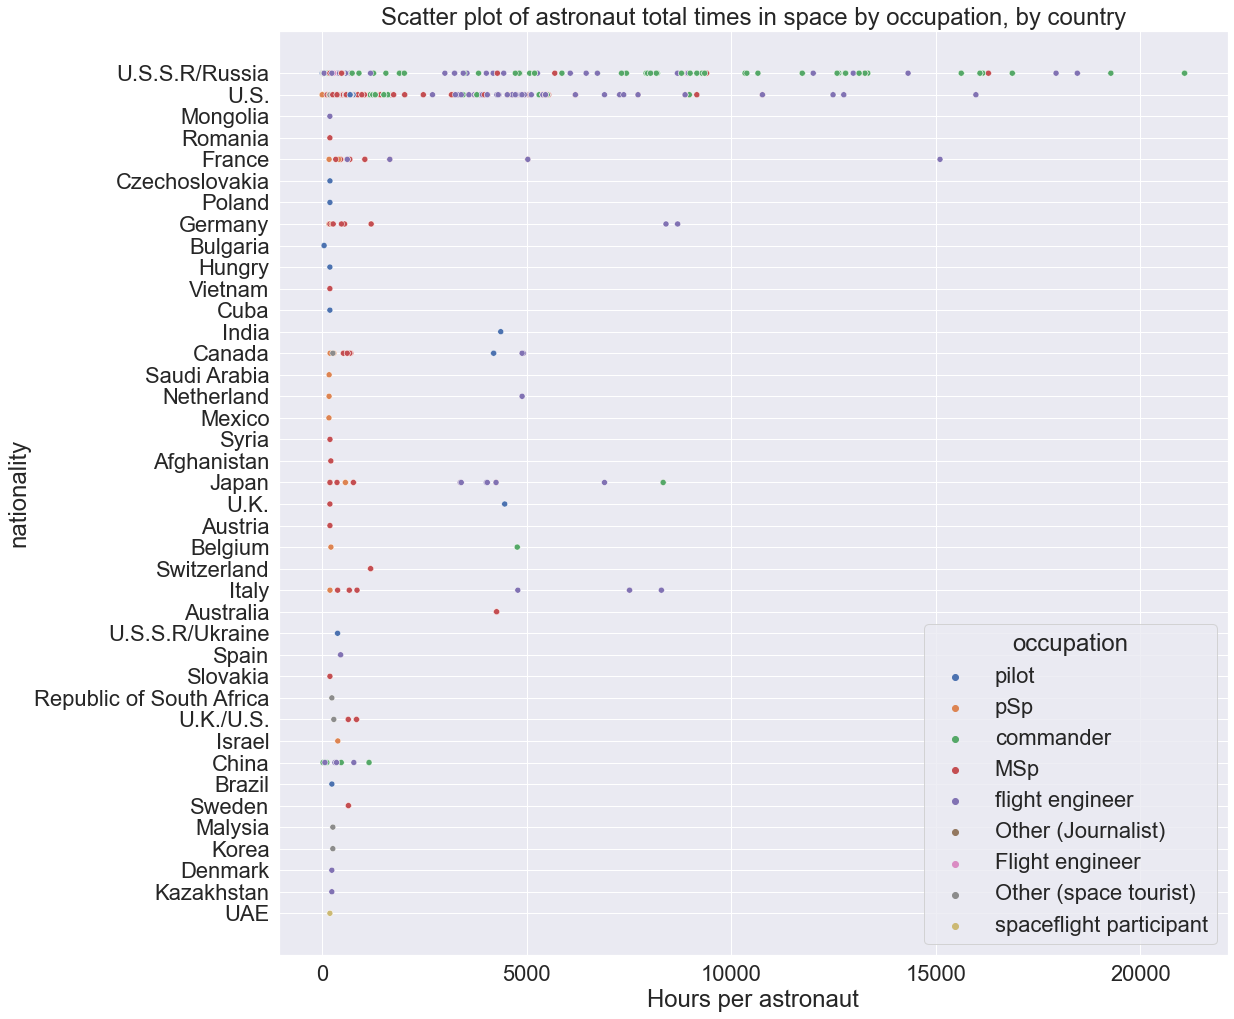

In [31]:
# Plot to see which occupation is utilized the most by each country 

plt.figure(figsize=(17,17))
# p = sns.boxplot(x='total_hrs_sum',y='nationality', data=data)
p = sns.scatterplot(data = data, x = 'total_hrs_sum',y='nationality', hue='occupation' )
p.set_title("Scatter plot of astronaut total times in space by occupation, by country")
p.set_xlabel('Hours per astronaut')
# p.tick_params(axis='x', size=2.1)



<AxesSubplot:>

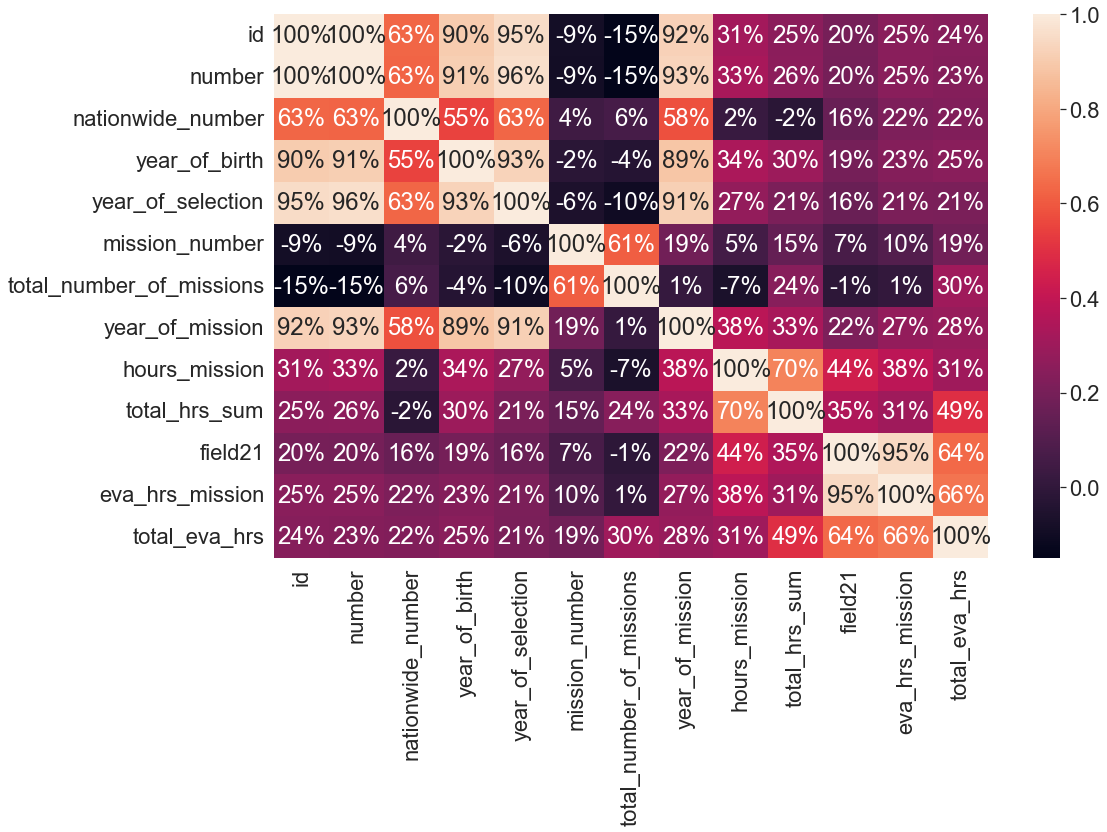

In [32]:
# Correlation Matrix
# the point of correlation matrix is to see which features are causing possible overfitting

# correlation 
corr = data.corr()
top_corr_feat = corr.index
plt.figure(figsize=(16, 10))
sns.heatmap(data[top_corr_feat].corr(), annot=True, fmt='.0%')